In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Walmart_Sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe


In [ ]:
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


# Display summary information

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


# Check for missing values

In [ ]:
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Display the summary statistics for numerical columns

In [ ]:
summary_statistics = data.describe()
summary_statistics

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


# Display the first few rows after converting the 'Date' column

In [ ]:
data_head_after_conversion = data.head()

data_head_after_conversion

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Descriptive statistics for each numerical column
desc_stats = data.describe()

# Descriptive statistics for each store
desc_stats_store = data.groupby('Store').describe()


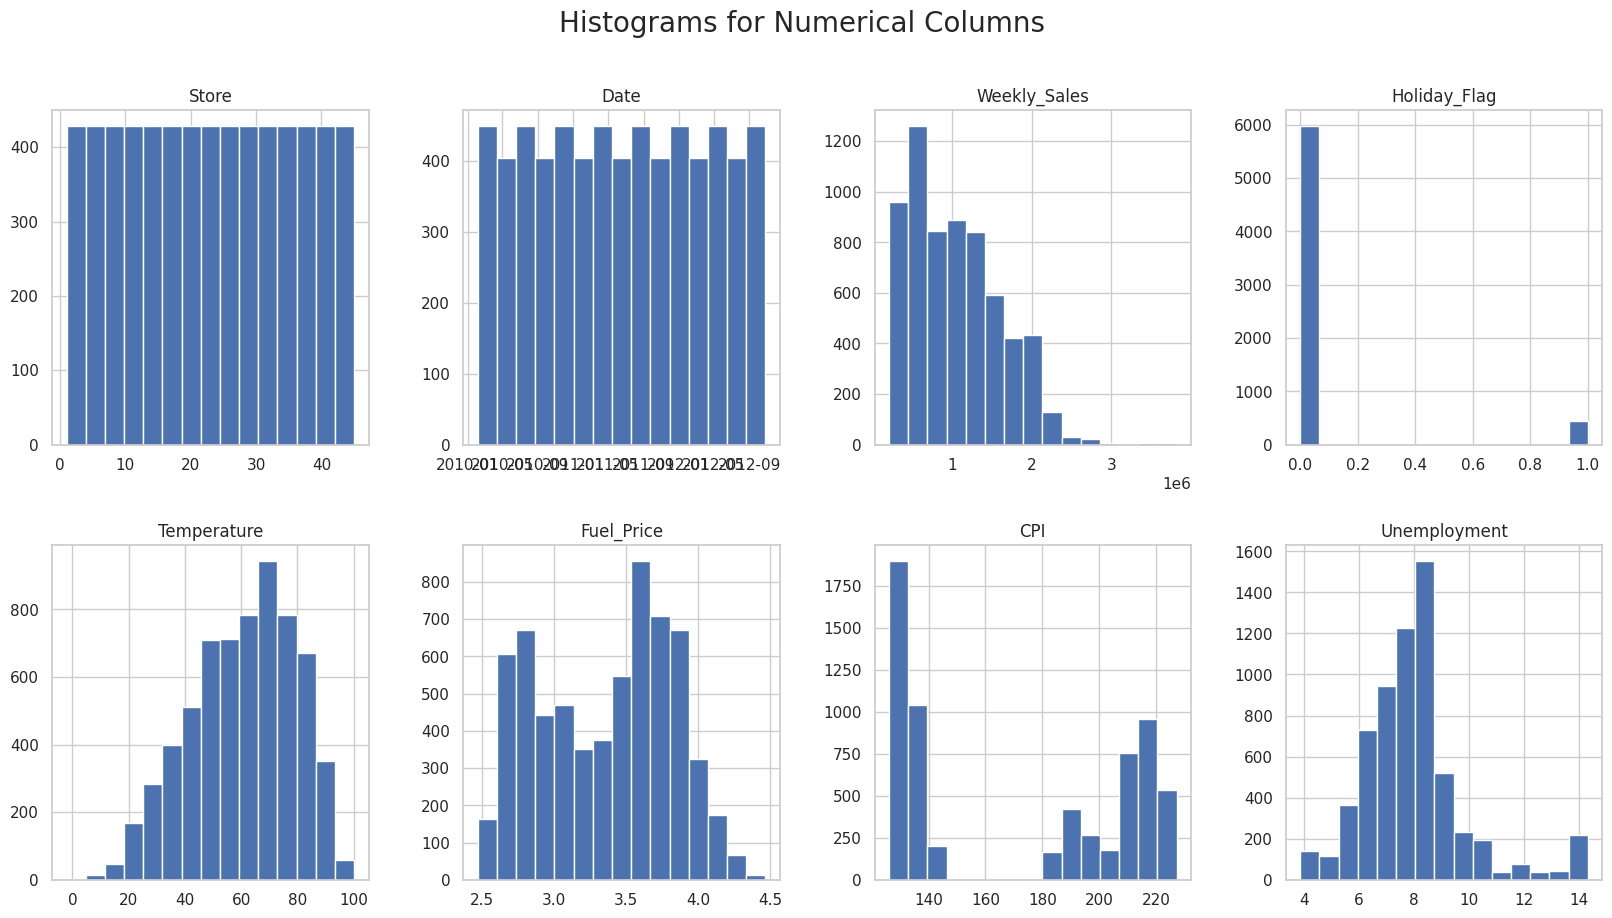

In [ ]:
# Histograms for numerical columns
data.hist(bins=15, figsize=(20, 10), layout=(2, 4))
plt.suptitle('Histograms for Numerical Columns', size=20)
plt.show()

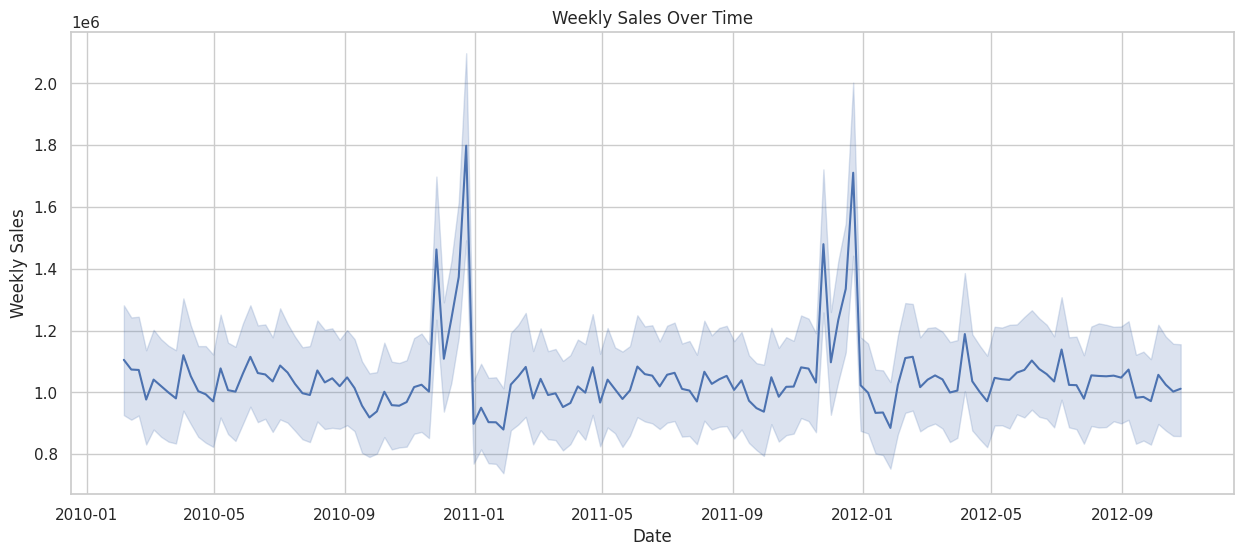

In [ ]:
# Line plot for weekly sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

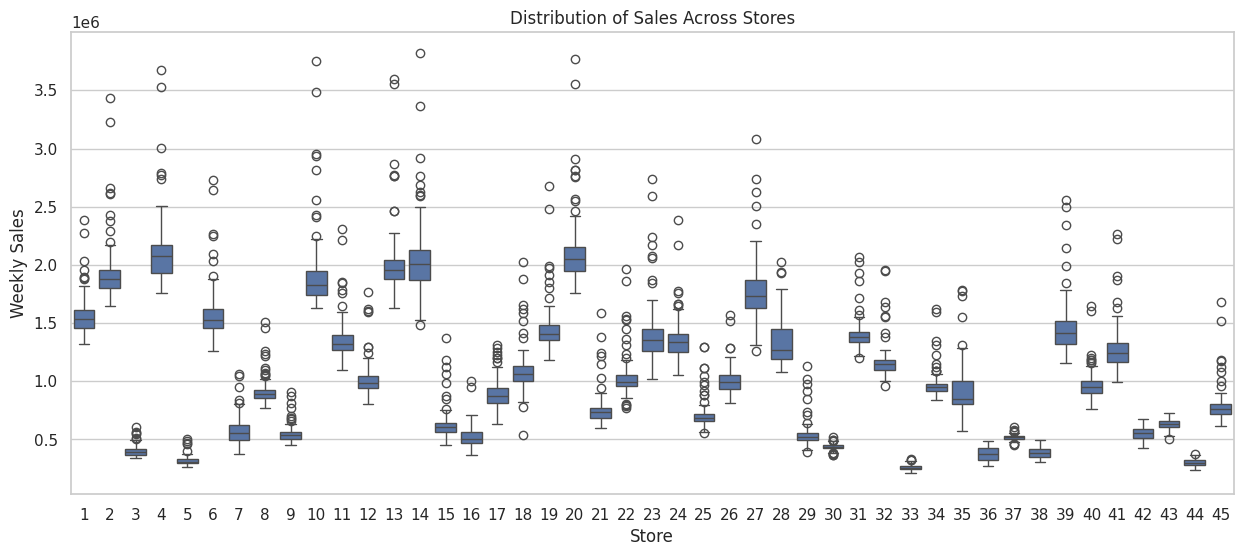

In [ ]:
# Box plot for sales across stores
plt.figure(figsize=(15, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Distribution of Sales Across Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

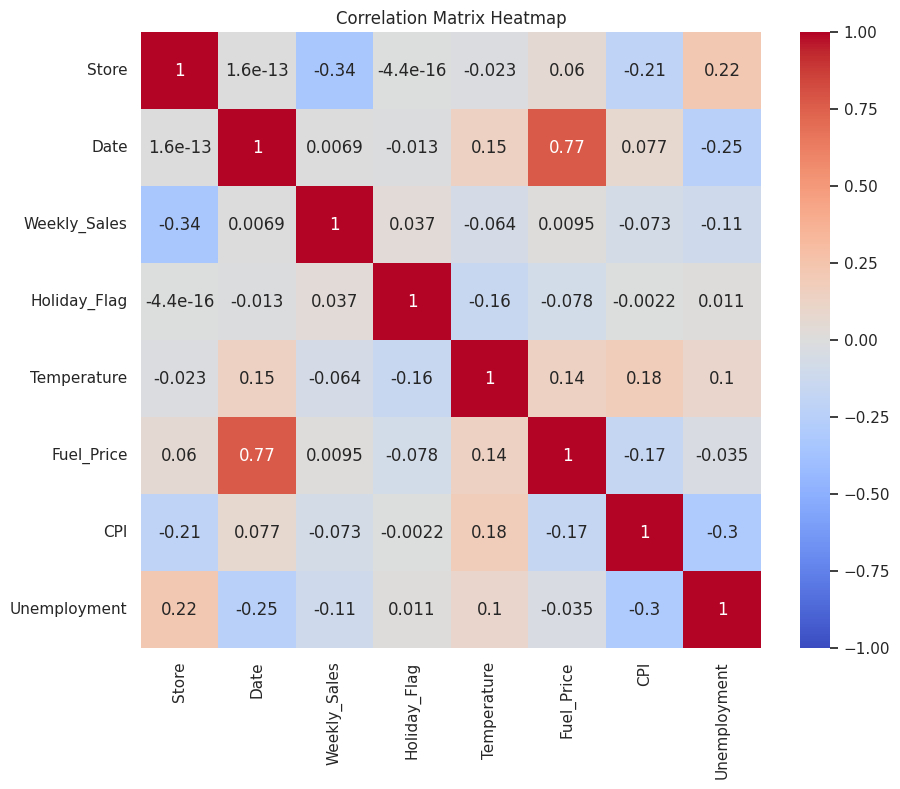

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

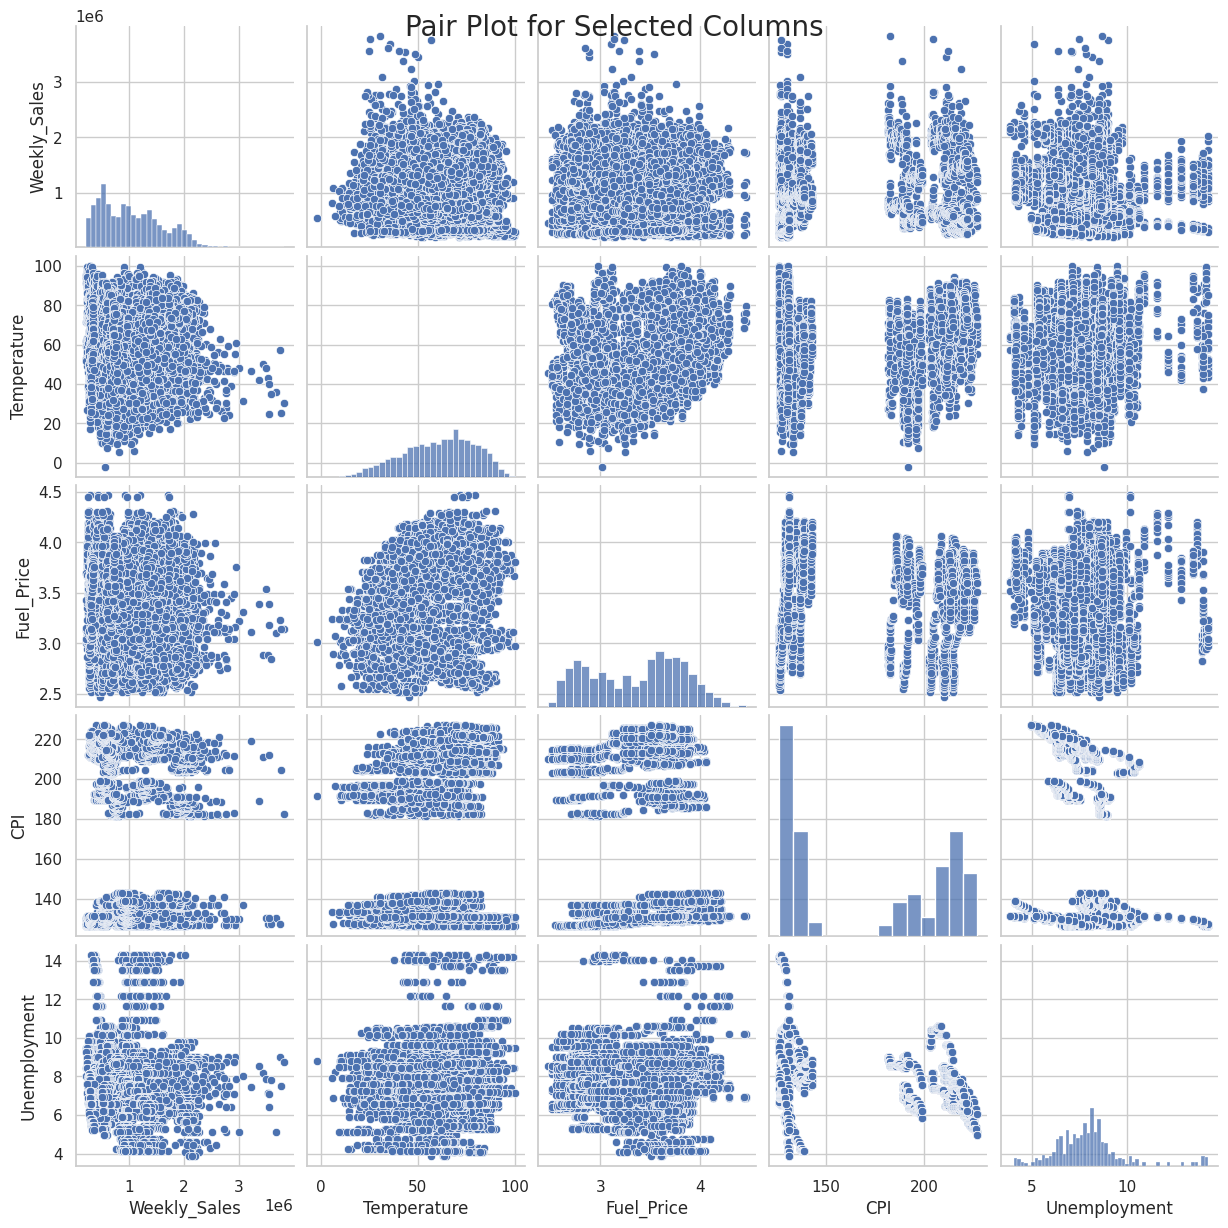

In [ ]:
# Pair plot for selected columns
sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle('Pair Plot for Selected Columns', size=20)
plt.show()



In [ ]:

!pip install pandasql matplotlib-venn


import pandasql as ps
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)


def execute_query(query):
    return ps.sqldf(query, globals())


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=940212e7f992a1624586db10f343b38bd356bf07739be96414dbe69c14f29643
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
# Total sales per store
query1 = """
SELECT Store, SUM(Weekly_Sales) AS Total_Sales
FROM data
GROUP BY Store
ORDER BY Total_Sales DESC
"""


result1 = execute_query(query1)


print(result1)

    Store   Total_Sales
0      20  3.013978e+08
1       4  2.995440e+08
2      14  2.889999e+08
3      13  2.865177e+08
4       2  2.753824e+08
5      10  2.716177e+08
6      27  2.538559e+08
7       6  2.237561e+08
8       1  2.224028e+08
9      39  2.074455e+08
10     19  2.066349e+08
11     31  1.996139e+08
12     23  1.987506e+08
13     24  1.940160e+08
14     11  1.939628e+08
15     28  1.892637e+08
16     41  1.813419e+08
17     32  1.668192e+08
18     18  1.551147e+08
19     22  1.470756e+08
20     12  1.442872e+08
21     26  1.434164e+08
22     34  1.382498e+08
23     40  1.378703e+08
24     35  1.315207e+08
25      8  1.299512e+08
26     17  1.277821e+08
27     45  1.123953e+08
28     21  1.081179e+08
29     25  1.010612e+08
30     43  9.056544e+07
31     15  8.913368e+07
32      7  8.159828e+07
33     42  7.956575e+07
34      9  7.778922e+07
35     29  7.714155e+07
36     16  7.425243e+07
37     37  7.420274e+07
38     30  6.271689e+07
39      3  5.758674e+07
40     38  5.515

In [ ]:
#Average sales per month
query2 = """
SELECT strftime('%Y-%m', Date) AS Month, AVG(Weekly_Sales) AS Avg_Sales
FROM data
GROUP BY Month
ORDER BY Month
"""


result2 = execute_query(query2)


print(result2)

      Month     Avg_Sales
0   2010-02  1.057405e+06
1   2010-03  1.010666e+06
2   2010-04  1.028499e+06
3   2010-05  1.037283e+06
4   2010-06  1.068034e+06
5   2010-07  1.033689e+06
6   2010-08  1.042445e+06
7   2010-09  9.848216e+05
8   2010-10  9.651637e+05
9   2010-11  1.126963e+06
10  2010-12  1.283380e+06
11  2011-01  9.094665e+05
12  2011-02  1.035174e+06
13  2011-03  9.964247e+05
14  2011-04  1.006784e+06
15  2011-05  1.009156e+06
16  2011-06  1.054297e+06
17  2011-07  1.021828e+06
18  2011-08  1.047774e+06
19  2011-09  9.815455e+05
20  2011-10  1.018118e+06
21  2011-11  1.167569e+06
22  2011-12  1.280347e+06
23  2012-01  9.383026e+05
24  2012-02  1.067020e+06
25  2012-03  1.028932e+06
26  2012-04  1.049561e+06
27  2012-05  1.048703e+06
28  2012-06  1.069379e+06
29  2012-07  1.041719e+06
30  2012-08  1.052670e+06
31  2012-09  1.003586e+06
32  2012-10  1.024232e+06


#Sales during holiday weeks vs non-holiday weeks

In [ ]:
query3 = """
SELECT Holiday_Flag, AVG(Weekly_Sales) AS Avg_Sales
FROM data
GROUP BY Holiday_Flag
"""


result3 = execute_query(query3)


print(result3)

   Holiday_Flag     Avg_Sales
0             0  1.041256e+06
1             1  1.122888e+06


# Find the best store for each year

In [ ]:
query4 = """
SELECT
    strftime('%Y', Date) AS Year,
    Store,
    SUM(Weekly_Sales) AS TotalSales
FROM data
GROUP BY Year, Store
ORDER BY Year, TotalSales DESC
"""

best_stores_by_year = execute_query(query4)


print(best_stores_by_year.groupby('Year').head(1))


    Year  Store    TotalSales
0   2010     14  1.054622e+08
45  2011      4  1.110923e+08
90  2012      4  9.277119e+07


#year wise each store contribution

In [ ]:
# Calculate yearly sales for each store
yearly_sales = data.groupby(['Store', data['Date'].dt.year])['Weekly_Sales'].sum().reset_index()
yearly_sales.rename(columns={'Date': 'Year', 'Weekly_Sales': 'Yearly_Sales'}, inplace=True)

# Calculate total sales for each year
total_sales_per_year = yearly_sales.groupby('Year')['Yearly_Sales'].sum().reset_index()

# Calculate the contribution of each store to the total yearly sales
yearly_sales['Contribution'] = yearly_sales.apply(lambda row: row['Yearly_Sales'] / total_sales_per_year[total_sales_per_year['Year'] == row['Year']]['Yearly_Sales'].values[0], axis=1)


print(yearly_sales)


     Store  Year  Yearly_Sales  Contribution
0        1  2010   73278832.00      0.032015
1        1  2011   80921918.83      0.033054
2        1  2012   68202058.02      0.034099
3        2  2010   95277864.19      0.041626
4        2  2011   98607881.42      0.040278
..     ...   ...           ...           ...
130     44  2011   15498194.67      0.006330
131     44  2012   14187373.72      0.007093
132     45  2010   38536343.37      0.016836
133     45  2011   41135367.88      0.016802
134     45  2012   32723630.17      0.016361

[135 rows x 4 columns]


#Which Branch is performing better?

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64


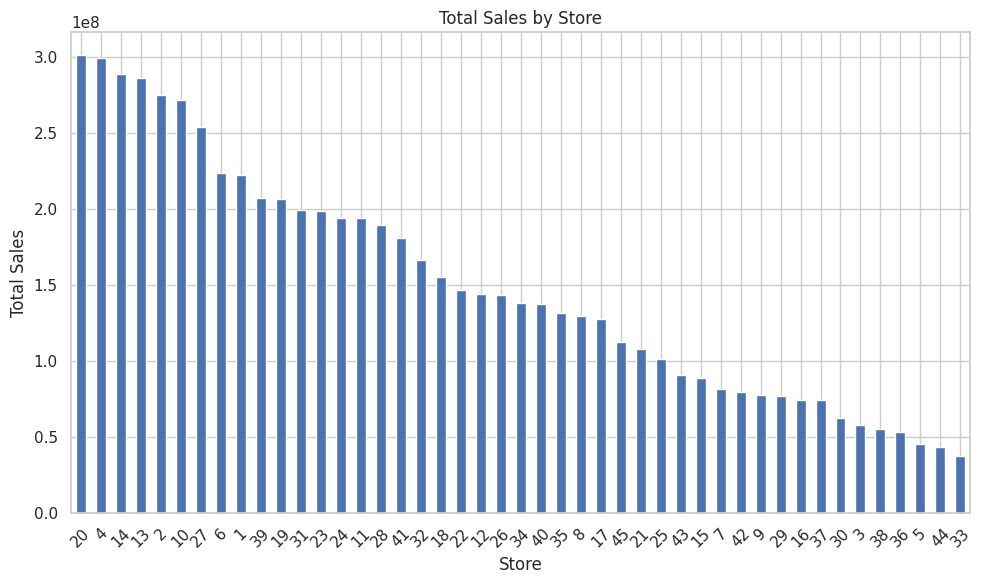

The best performing store is Store 20


In [ ]:
# Group data by store and calculate total sales
store_performance = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Print the store performance
print(store_performance)

# Plot the store performance
plt.figure(figsize=(10, 6))
store_performance.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the best performing store
best_store = store_performance.index[0]
print(f"The best performing store is Store {best_store}")
